In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/Data_Train.xlsx',parse_dates=['Date_of_Journey'])
df.shape

<ipython-input-2-fa412e07cbb9>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_excel('/content/Data_Train.xlsx',parse_dates=['Date_of_Journey'])


(10683, 11)

In [ ]:
# df2 = pd.read_excel('/content/Test_set.xlsx',parse_dates=['Date_of_Journey'])
# df2.shape

In [ ]:
# merged = [df1,df2]

In [ ]:
# df = pd.concat(merged)
# df.shape

In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,2019-09-05,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [ ]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year


In [ ]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [ ]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(" ")[0])

In [ ]:
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: x.split(":")[0])
df['Arrival_Mins'] = df['Arrival_Time'].apply(lambda x: x.split(":")[1])

In [ ]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Mins'] = df['Arrival_Mins'].astype(int)

In [ ]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
df['Dep_Hours'] = df['Dep_Time'].apply(lambda x: x.split(":")[0])
df['Dep_Mins'] = df['Dep_Time'].apply(lambda x: x.split(":")[1])
df['Dep_Hours'] = df['Dep_Hours'].astype(int)
df['Dep_Mins'] = df['Dep_Mins'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4 ,'nan':1}
df['Total_Stops'] = df['Total_Stops'].map(stops)

In [ ]:
df.drop(['Route'],inplace=True,axis=1)
df.drop(['Additional_Info'],axis=1,inplace=True)

In [ ]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,DayofWeek,Arrival_Hour,Arrival_Mins,Dep_Hours,Dep_Mins
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,Sunday,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,5,1,2019,Saturday,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,6,9,2019,Friday,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,5,12,2019,Thursday,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,3,1,2019,Thursday,21,35,16,50


In [ ]:
df['Duration'].replace(['5m','50m'],inplace=True)

In [ ]:
df['Duration_Hours'] = df['Duration'].str.split(" ").str[0].str.split('h').str[0].astype(int)


In [ ]:
df['Duration_Mins'] = df['Duration'].str.split(" ").str[1]

In [ ]:
df['Duration_Mins'].replace([np.nan,'0'],inplace=True)

In [ ]:
df['Duration_Mins'] = df['Duration_Hours']*60 + df['Duration_Mins'].str.split(" ").str[0].str.split('m').str[0].astype(int)

In [ ]:
df.drop(['Duration','Duration_Hours'],inplace=True,axis=1)

#EDA

In [ ]:
plt.style.use('fivethirtyeight')
#plt.style.available

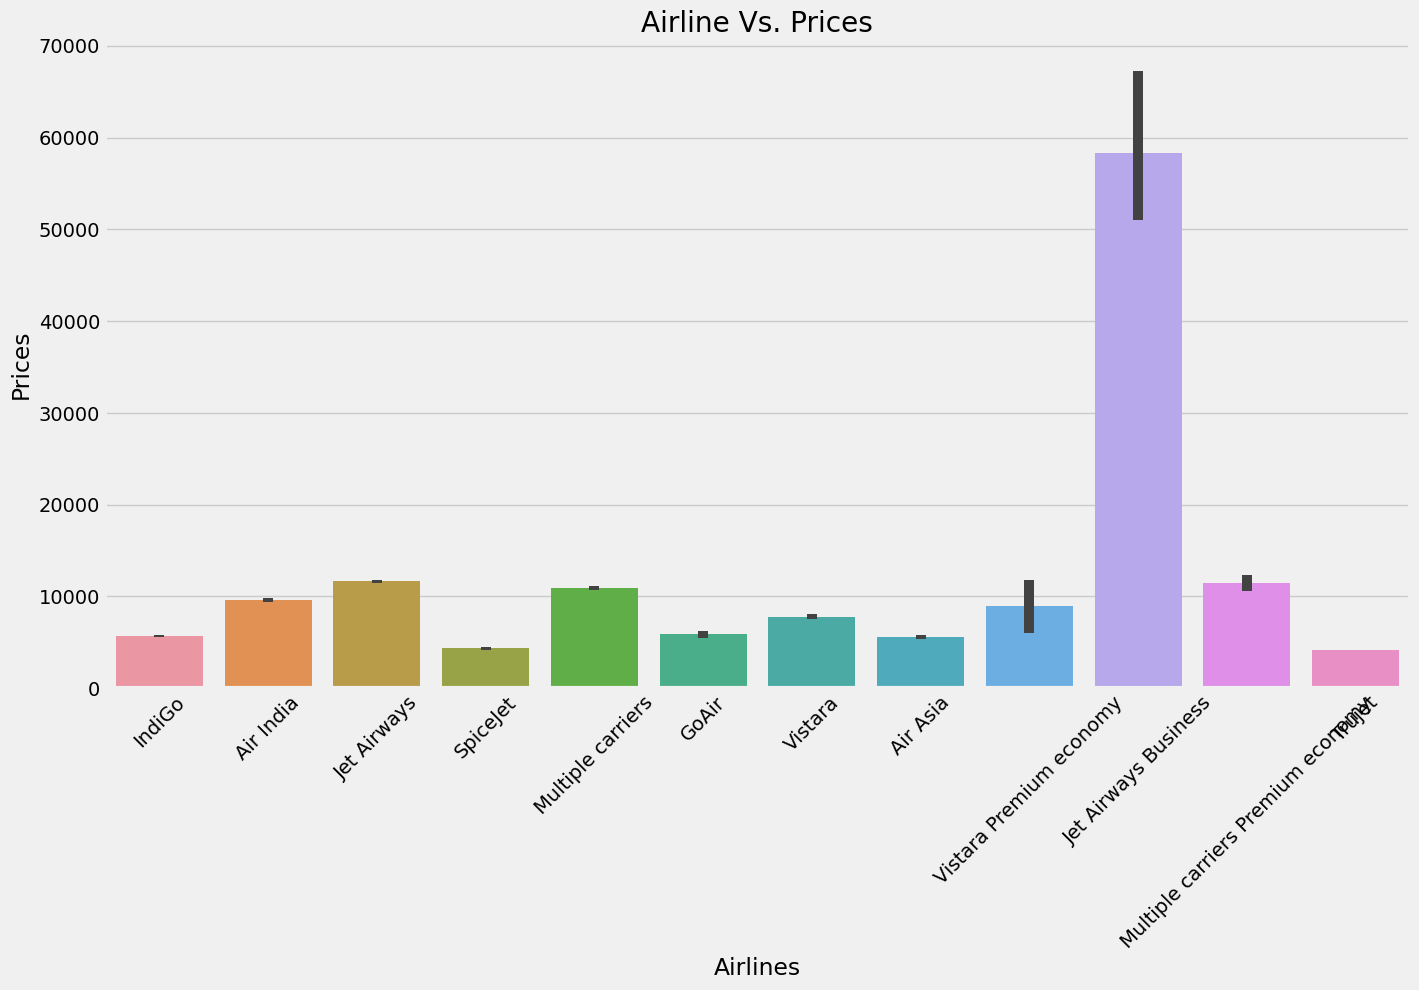

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Airline Vs. Prices')
sns.barplot(data=df,x='Airline',y='Price')
plt.xticks(rotation=45)
plt.xlabel('Airlines')
plt.ylabel('Prices')
plt.show()


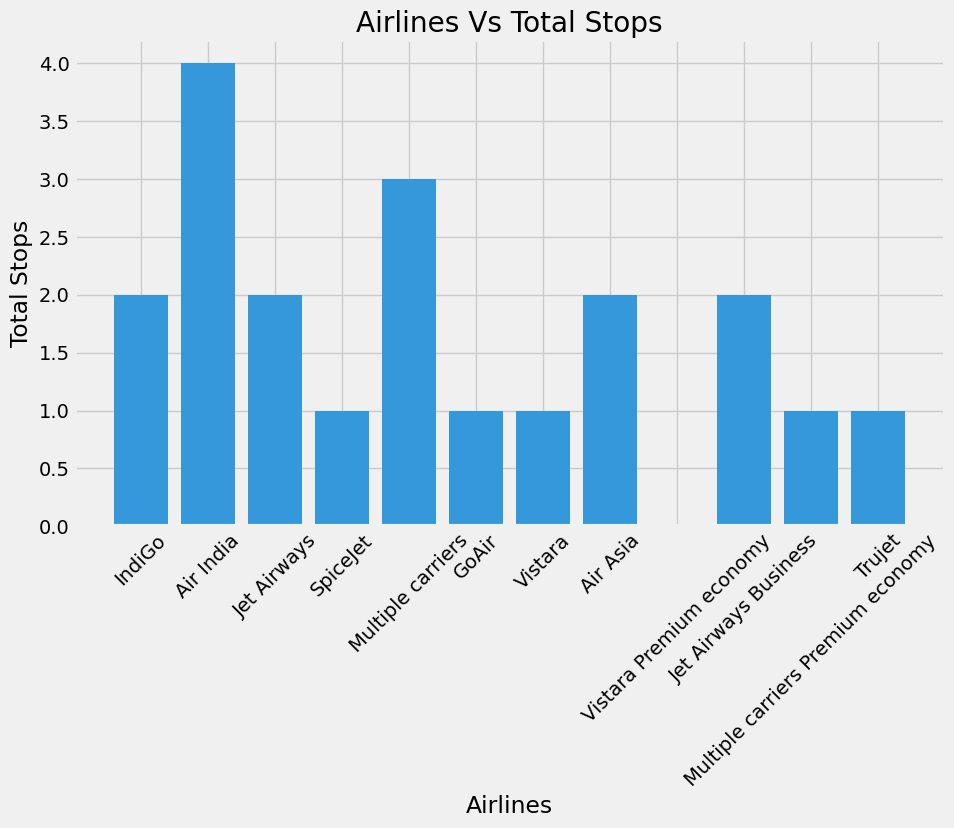

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Airlines Vs Total Stops')
plt.bar(df['Airline'], df['Total_Stops'], color="#3498db")
plt.xticks(rotation=45)
plt.xlabel('Airlines')
plt.ylabel('Total Stops')
plt.show()

In [ ]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,DayofWeek,Arrival_Hour,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_Mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,Sunday,1,10,22,20,170
1,Air India,Kolkata,Banglore,2.0,7662,5,1,2019,Saturday,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2.0,13882,6,9,2019,Friday,4,25,9,25,1165
3,IndiGo,Kolkata,Banglore,1.0,6218,5,12,2019,Thursday,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1.0,13302,3,1,2019,Thursday,21,35,16,50,285


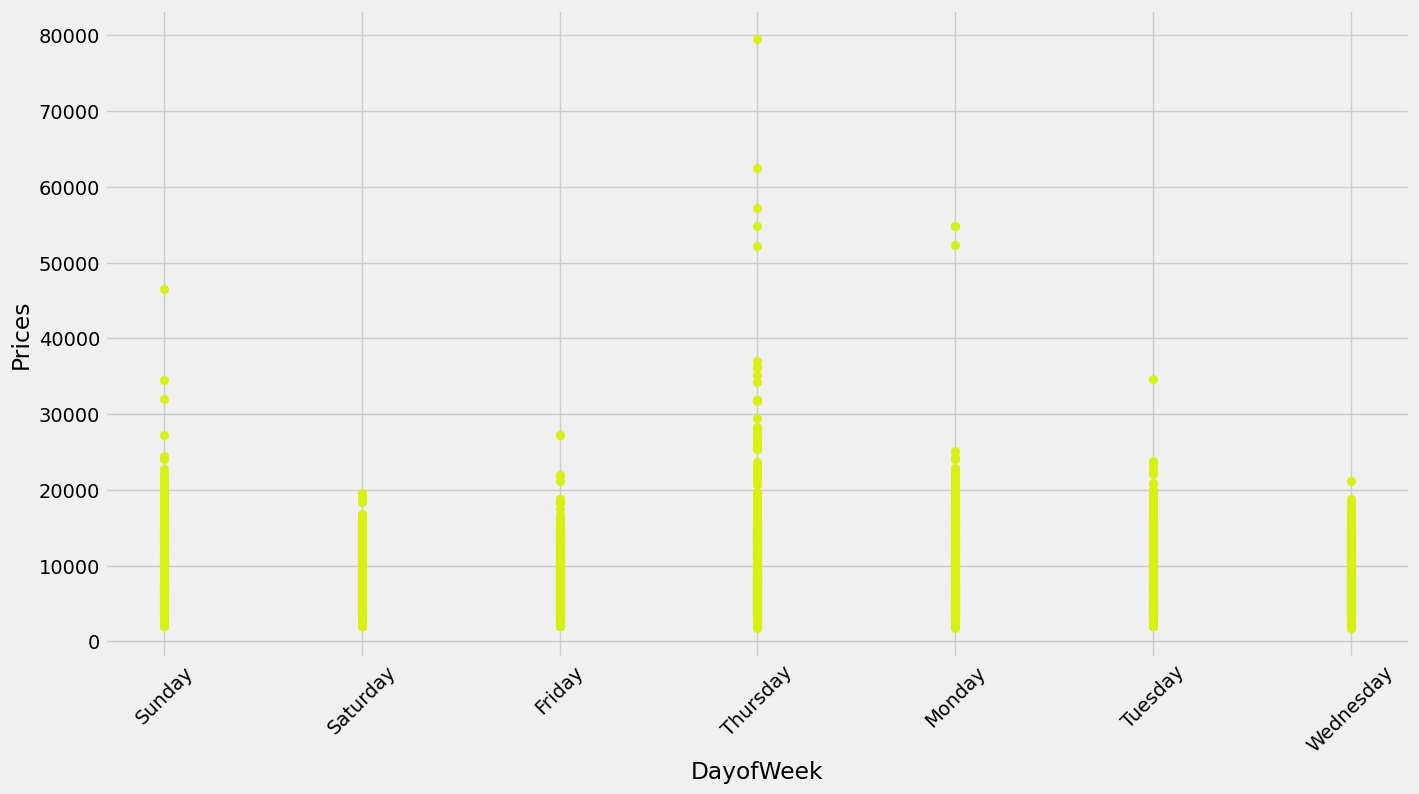

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(df['DayofWeek'],df['Price'],color='#D9F10F')
plt.xticks(rotation=45)
plt.xlabel('DayofWeek')
plt.ylabel('Prices')
plt.show()


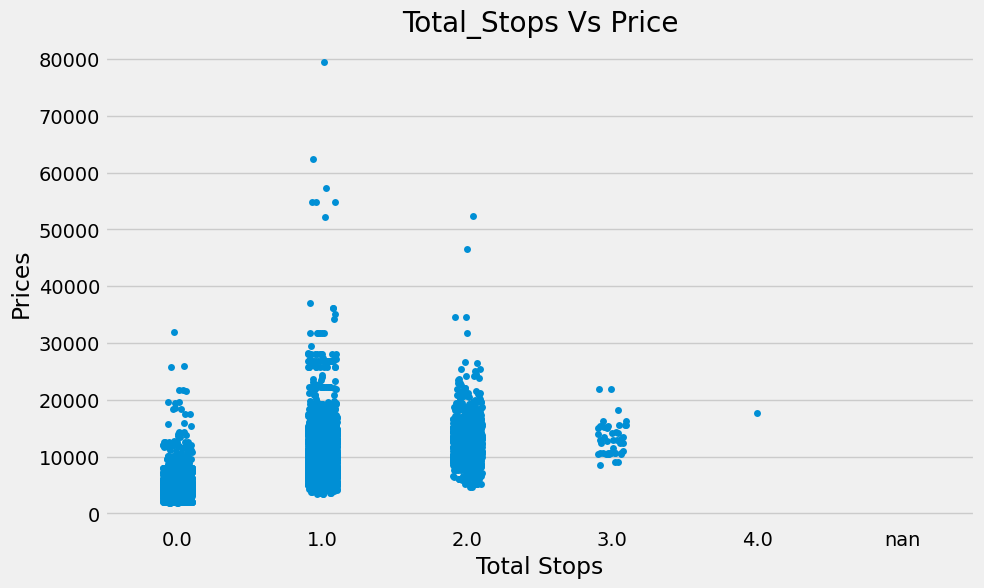

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Total_Stops Vs Price')
sns.stripplot(data=df, x='Total_Stops',y='Price')
plt.xlabel('Total Stops')
plt.ylabel('Prices')
plt.show()


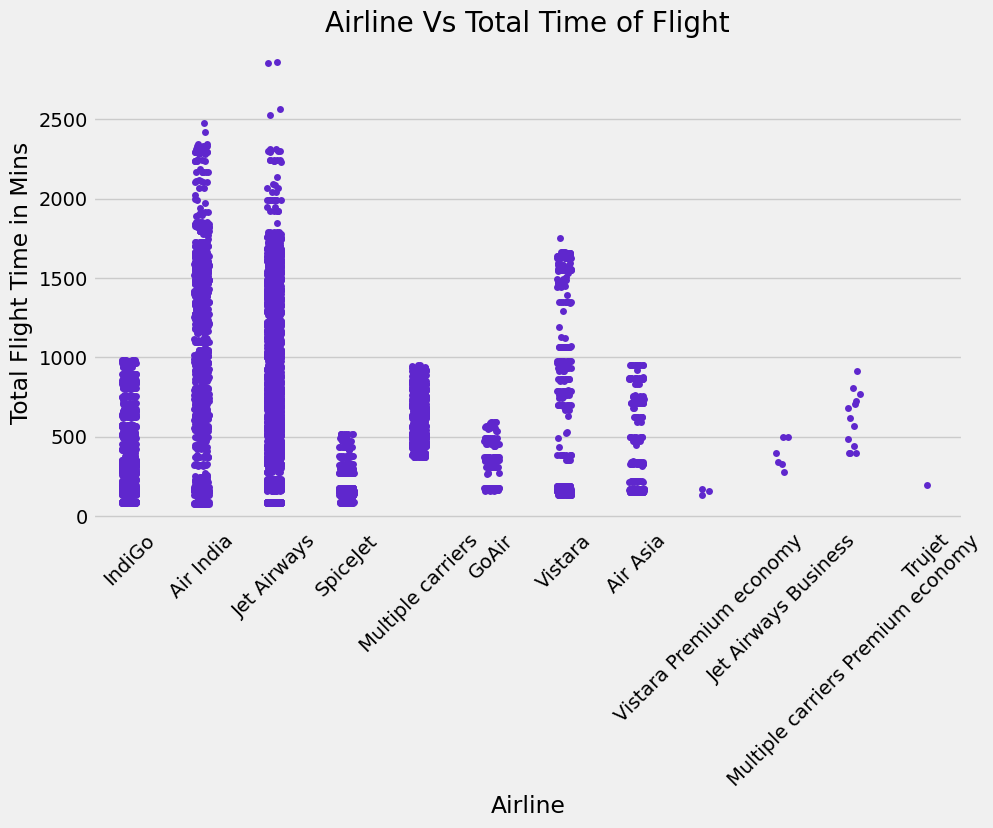

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Airline Vs Total Time of Flight')
sns.stripplot(data=df, x='Airline',y='Duration_Mins',color='#5f27cd')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.ylabel('Total Flight Time in Mins')
plt.show()


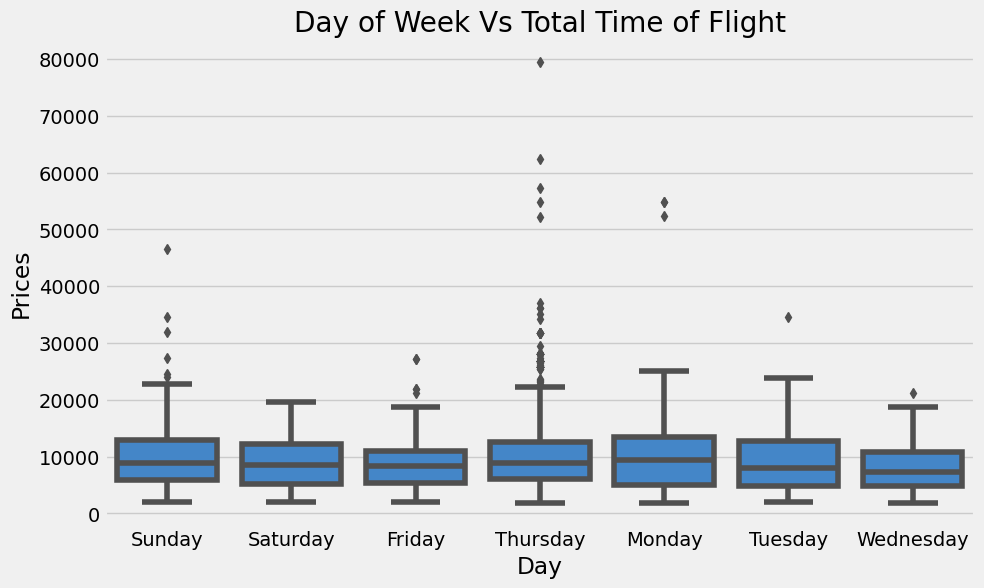

In [ ]:

# Box plot
plt.figure(figsize=(10,6))
plt.title('Day of Week Vs Total Time of Flight')
sns.boxplot(data=df,x='DayofWeek',y='Price',color='#2e86de')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.show()


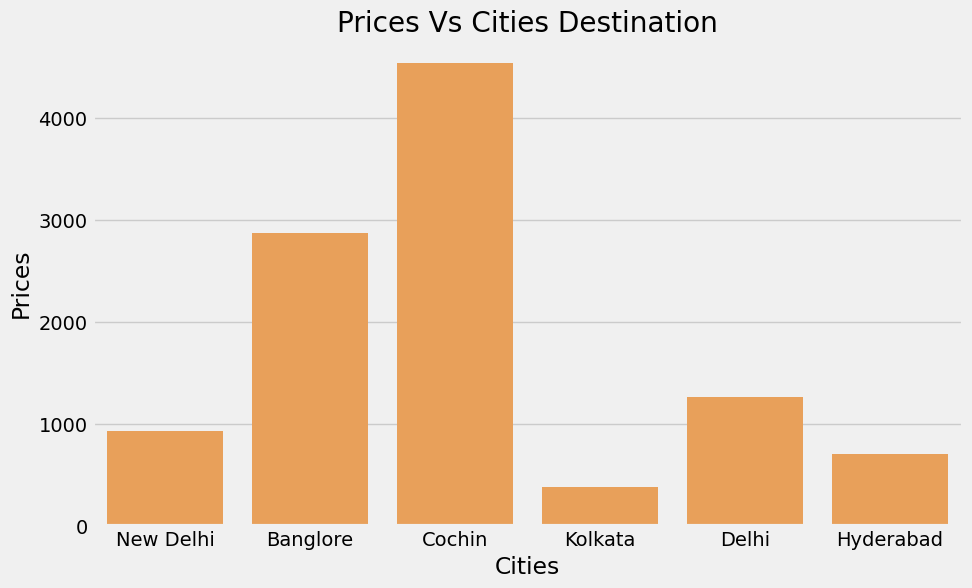

In [ ]:
# countplot
plt.figure(figsize=(10,6))
plt.title('Prices Vs Cities Destination')
sns.countplot(data=df,x='Destination',color='#ff9f43')

plt.xlabel('Cities')
plt.ylabel('Prices')
plt.show()

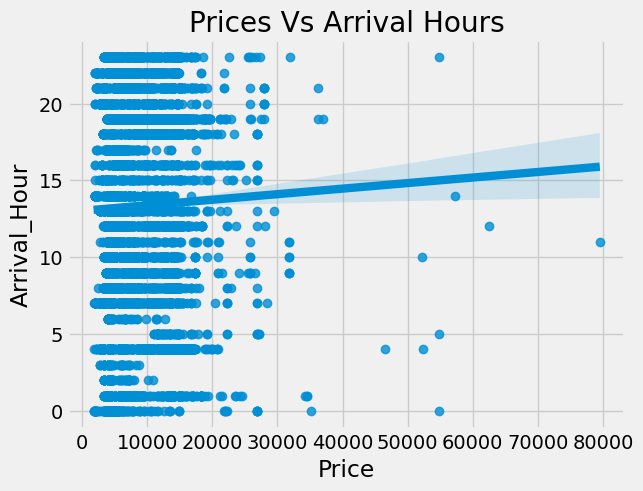

In [ ]:
sns.regplot(data=df,x='Price',y='Arrival_Hour')
plt.title('Prices Vs Arrival Hours')
plt.show()

In [ ]:
#categorical data
ohe_cols = ['Airline', 'Source', 'Destination']

#import pandas as pd
df = pd.get_dummies(df, columns = ohe_cols,drop_first=True)
df.head()

,Total_Stops,Price,Day,Month,Year,DayofWeek,Arrival_Hour,Arrival_Mins,Dep_Hours,Dep_Mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2019,Sunday,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,1,2019,Saturday,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,6,9,2019,Friday,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,5,12,2019,Thursday,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,3,1,2019,Thursday,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(10683, 31)

In [ ]:
df.drop(['Year'],inplace=True,axis=1)

In [ ]:
df.head()

,Total_Stops,Price,Day,Month,DayofWeek,Arrival_Hour,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_Mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,Sunday,1,10,22,20,170,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,1,Saturday,13,15,5,50,445,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,6,9,Friday,4,25,9,25,1165,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,5,12,Thursday,23,30,18,5,325,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,3,1,Thursday,21,35,16,50,285,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(['DayofWeek'],axis=1,inplace=True)

In [ ]:
df[df['Total_Stops'].isna()]

,Total_Stops,Price,Day,Month,Arrival_Hour,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_Mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
9039,NaN,7480,5,6,9,25,9,45,1420,1,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape


((7478, 28), (3205, 28))

In [ ]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.21691888, -0.9874751 ,  0.14475523, ..., -0.26335351,
        -0.1920494 , -0.30697672],
       [ 0.26930019, -0.75959858, -1.52162349, ..., -0.26335351,
        -0.1920494 , -0.30697672],
       [ 1.75551927, -0.75959858,  2.14440969, ..., -0.26335351,
        -0.1920494 , -0.30697672],
       ...,
       [ 0.26930019, -1.10141336, -0.855072  , ..., -0.26335351,
        -0.1920494 , -0.30697672],
       [ 0.26930019,  0.60766058, -0.18852051, ..., -0.26335351,
        -0.1920494 , -0.30697672],
       [ 0.26930019, -0.87353684,  1.14458246, ..., -0.26335351,
        -0.1920494 , -0.30697672]])

#Support Vector Regresion

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1)
svr.fit(X_train_scaled, y_train)

SVR(C=1)

In [ ]:
svr.predict(X_test_scaled)

array([8168.60607314, 7953.6842219 , 8474.75363574, ..., 8475.31357901,
       8585.70423721, 7958.37295673])

In [ ]:
svr.score(X_test_scaled, y_test)

0.052526028968077454

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001,0.0001],
#               'kernel': ['rbf','poly','linear','sigmoid']
#               }

# grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# # fitting the model for grid search
# grid.fit(X_train_scaled, y_train)

In [ ]:
svr.get_params()

{'C': 1,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

In [ ]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.5790975725322922

In [ ]:
# Ridge
reg = Ridge(alpha=0.1)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.5790965303081654

In [ ]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.5790966073212893

In [ ]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9) #ridge=90% and lasso=10% weightage
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.602e+10, tolerance: 1.622e+07
  model = cd_fast.enet_coordinate_descent(


0.5791004712169069

#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

0.7073031302744607

In [ ]:
#Hyperparameter Tuning
# param_grid = {
#     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#     'splitter': ['best','random'],

#     }

# reg = GridSearchCV(dt,param_grid=param_grid)
# reg.fit(X_train,y_train)

In [ ]:
# print(reg.best_score_)
# reg.best_params_

In [ ]:
#{'criterion': 'poisson', 'splitter': 'random'}
dt = DecisionTreeRegressor(criterion='poisson',splitter='random')
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

0.6535754559152848

In [ ]:
#Feature Importance
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True):
  print(name, importance)


Duration_Mins 0.49734310384789393
Day 0.09282181710822585
Month 0.06649219816527706
Airline_IndiGo 0.05914410181186537
Airline_Jet Airways 0.04352369477248307
Airline_Jet Airways Business 0.03581873286159343
Dep_Mins 0.029082257704100157
Destination_New Delhi 0.027664444668078134
Dep_Hours 0.025824401188968418
Total_Stops 0.020778482851870093
Arrival_Mins 0.018334145415258237
Arrival_Hour 0.018079498378105147
Airline_SpiceJet 0.01233851898209683
Source_Mumbai 0.009323214666398402
Airline_Multiple carriers 0.008938825257889142
Airline_Air India 0.008615755514719683
Source_Kolkata 0.006547533998153035
Airline_Vistara 0.004751002785732142
Destination_Cochin 0.0027529599207726635
Destination_Hyderabad 0.002705061256216457
Airline_GoAir 0.002392936557641199
Source_Delhi 0.002231598834321109
Destination_Delhi 0.0017692990932146025
Source_Chennai 0.0015998920110399243
Airline_Multiple carriers Premium economy 0.0009324394577006917
Destination_Kolkata 0.00012763284167323553
Airline_Vistara Pre

#Ensemble Voting Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

estimators = [('lr',lr),('dt',dt),('svr',svr)]

for estimator in estimators:
  scores = cross_val_score(estimator[1],X_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.63
dt 0.68
svr 0.13


In [ ]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.68


In [ ]:
# using the same algorithm
dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]
for estimator in estimators:
  scores = cross_val_score(estimator[1],X_train,y_train,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

dt1 0.4
dt2 0.59
dt3 0.71
dt4 0.74
dt5 0.67


In [ ]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X_train,y_train,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.73


#Stacking

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(),cv=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.8021426715140691

#Bagging

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)


y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [ ]:
print("R^2 score for LR",r2_score(y_test,y_pred1))
print("R^2 score for DT",r2_score(y_test,y_pred2))
print("R^2 score for KNN",r2_score(y_test,y_pred3))

R^2 score for LR 0.5790963736221109
R^2 score for DT 0.6936903775180243
R^2 score for KNN 0.558379920259128


In [ ]:
#Now using Bagging Regressor
from sklearn.ensemble import BaggingRegressor
bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, y_train)

BaggingRegressor(random_state=1)

In [ ]:
Y_preds = bag_regressor.predict(X_test)
print("R^2 score for Bagging Regressor is: ",r2_score(y_test,Y_preds))
print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, y_train)) #Overfitting is happening
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, y_test))

R^2 score for Bagging Regressor is:  0.8013476149715382
Training Coefficient of R^2 : 0.952
Test Coefficient of R^2 : 0.801


In [ ]:
# %%time

# params = {'base_estimator': [LinearRegression(), KNeighborsRegressor(),DecisionTreeRegressor()],
#           'n_estimators': [20,50,100],
#           'max_samples': [0.5,1.0],
#           'max_features': [0.5,1.0],
#           'bootstrap': [True, False],
#           'bootstrap_features': [True, False]}

# bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
# bagging_regressor_grid.fit(X_train, y_train)

# print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, y_train))
# print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, y_test))
# print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
# print('Best Parameters : ',bagging_regressor_grid.best_params_)

#{'base_estimator': DecisionTreeRegressor(), 'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train R^2 Score : 0.939
Test R^2 Score : 0.799
Best R^2 Score Through Grid Search : 0.802
Best Parameters :  {'base_estimator': DecisionTreeRegressor(), 'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
CPU times: user 5.92 s, sys: 1.11 s, total: 7.03 s
Wall time: 8min 25s


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.tree import plot_tree

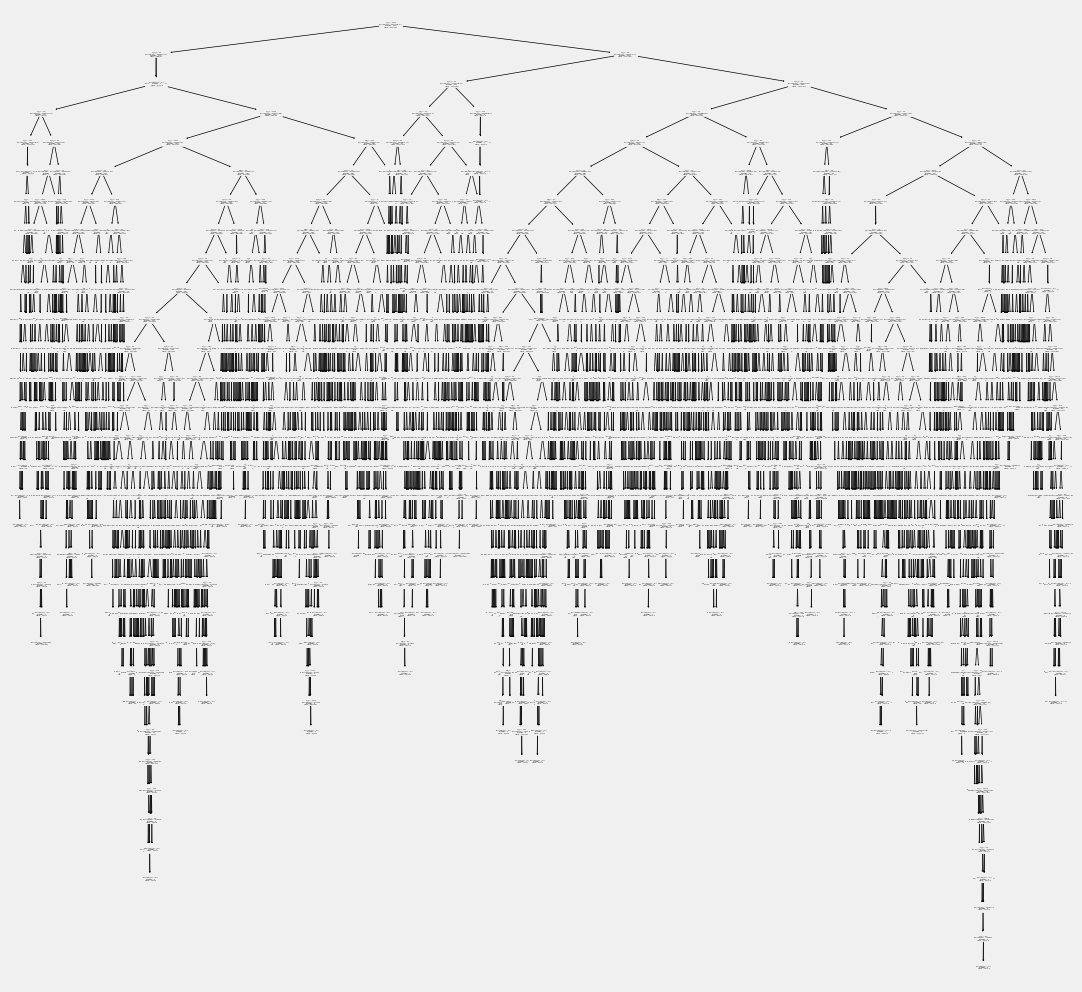

In [ ]:
br = BaggingRegressor()
br.fit(X_train,y_train)
plt.figure(figsize=(12,12))
plot_tree(br.estimators_[0])
plt.show()


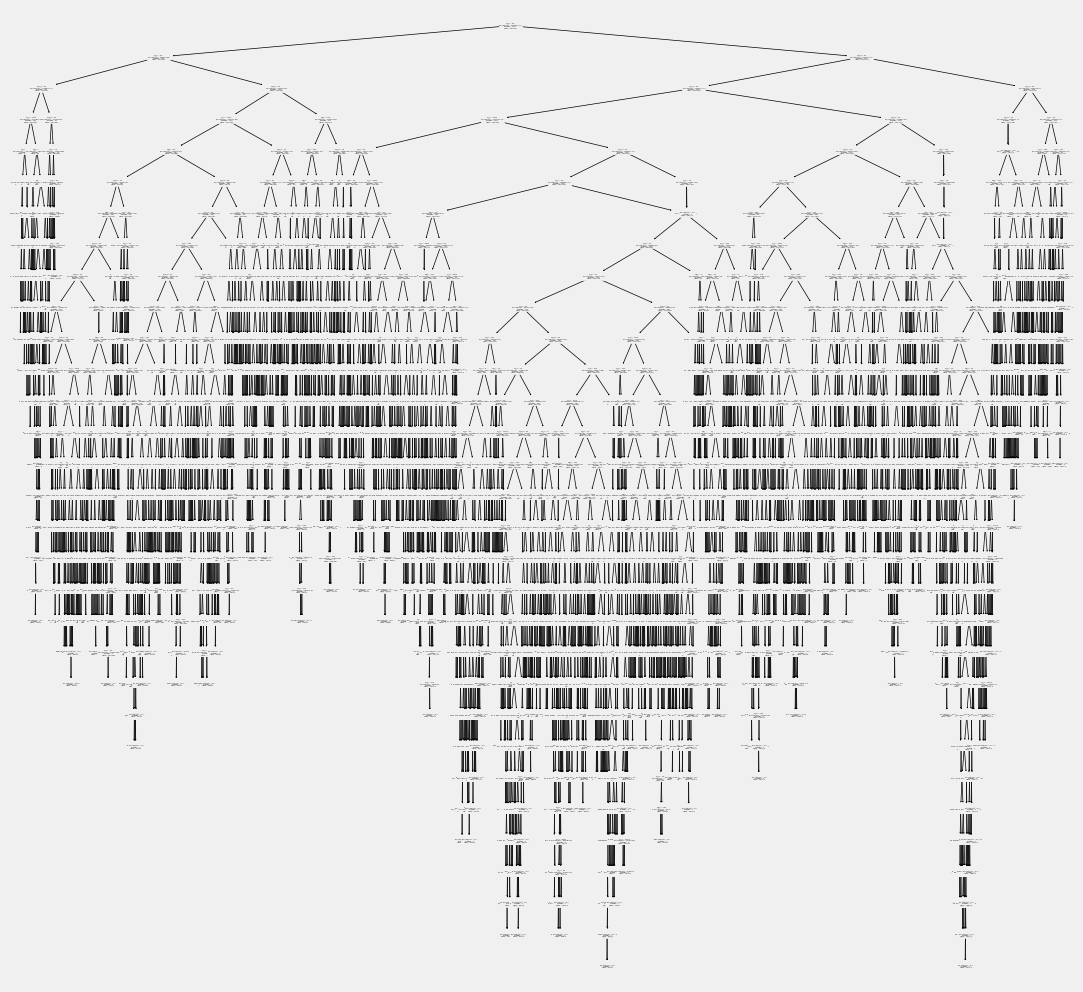

In [ ]:

rf = RandomForestRegressor(max_features=10)
rf.fit(X_train,y_train)
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

In [ ]:

y_predr = br.predict(X_test)
r2_score(y_test,y_predr)

0.8041537858250675

In [ ]:

y_preds = rf.predict(X_test)
r2_score(y_test,y_preds)

0.808786824542502

In [ ]:
"""{'bootstrap': True,'ccp_alpha': 0.0,'criterion': 'squared_error','max_depth': None,'max_features': 10,'max_leaf_nodes': None,
    'max_samples': None,'min_impurity_decrease': 0.0,'min_samples_leaf': 1,'min_samples_split': 2,'min_weight_fraction_leaf': 0.0,'n_estimators': 100,
    'n_jobs': None,'oob_score': False,'random_state': None,'verbose': 0,'warm_start': False}"""

In [ ]:
#RandomForestRegressor HyperParameter Tuning

# params = {
#           'n_estimators': [20,40,50,70,90,100,110,120],
#           'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#           'max_features': ['sqrt','log2']}

# rfgs = GridSearchCV(RandomForestRegressor(), param_grid =params, cv=5, n_jobs=-1, verbose=1)
# rfgs.fit(X_train, y_train)

# print('Train R^2 Score : %.3f'%rfgs.best_estimator_.score(X_train, y_train))
# print('Test R^2 Score : %.3f'%rfgs.best_estimator_.score(X_test, y_test))
# print('Best R^2 Score Through Grid Search : %.3f'%rfgs.best_score_)
# print('Best Parameters : ',rfgs.best_params_)

#Best Parameters :  {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 110}

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Train R^2 Score : 0.942
Test R^2 Score : 0.809
Best R^2 Score Through Grid Search : 0.811
Best Parameters :  {'criterion': 'absolute_error', 'max_features': 'sqrt', 'n_estimators': 110}


In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestRegressor(),X_train,y_train,cv=10,scoring='r2'))

0.8008290009709281

In [ ]:
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

0.7982471166019232

In [ ]:
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.8095744147840478

In [ ]:
#Using the Grid Search CV Best HyperParameters
rf = RandomForestRegressor(criterion='absolute_error', max_features='sqrt', n_estimators=110)
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
r2_score(y_test,y_preds)

0.8065486712258703

In [ ]:
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train,y_train)
print(rf.oob_score_)
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.800155678528714


0.8111989469912084

In [ ]:
#HyperParameter Using Bayesian Optimization
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

space = {'criterion': hp.choice('criterion', ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']), #for categorical parameters
        'max_depth': hp.choice('max_depth', [None,10,50,100,200]),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'n_estimators' : hp.randint('n_estimators',200)
    }

In [ ]:
def objective(space):
    model = RandomForestRegressor(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 n_estimators = space['n_estimators']
                                 )

    score = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -score, 'status': STATUS_OK }

In [ ]:
from sklearn.model_selection import cross_val_score
"""The Trials object is used to keep All hyperparameters, loss, and other information,
this means you can access them after running optimization.
Also, trials can help you to save important information and later load and then resume the optimization process."""

# trials = Trials() # minimizing the fn value
# best = fmin(fn= objective,
#             space= space,
#             algo= tpe.suggest, #
#             max_evals = 80,
#             trials= trials)
# best

  0%|          | 0/80 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

  9%|▉         | 7/80 [18:19<3:59:38, 196.97s/trial, best loss: -0.807401739502658]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 16%|█▋        | 13/80 [20:29<38:10, 34.18s/trial, best loss: -0.807401739502658]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 18%|█▊        | 14/80 [25:03<1:57:00, 106.37s/trial, best loss: -0.807401739502658]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 19%|█▉        | 15/80 [25:08<1:22:14, 75.91s/trial, best loss: -0.807401739502658] 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 41%|████▏     | 33/80 [48:38<1:40:57, 128.88s/trial, best loss: -0.8104453423432554]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 49%|████▉     | 39/80 [1:06:54<1:25:32, 125.17s/trial, best loss: -0.8121944588794895]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 55%|█████▌    | 44/80 [1:18:29<1:01:22, 102.28s/trial, best loss: -0.8121944588794895]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 60%|██████    | 48/80 [1:20:42<27:24, 51.39s/trial, best loss: -0.8121944588794895]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 68%|██████▊   | 54/80 [1:26:57<19:56, 46.02s/trial, best loss: -0.8121944588794895]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 76%|███████▋  | 61/80 [1:30:06<11:03, 34.94s/trial, best loss: -0.8121944588794895]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

 95%|█████████▌| 76/80 [1:44:38<02:28, 37.24s/trial, best loss: -0.8121944588794895]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegresso

100%|██████████| 80/80 [1:59:27<00:00, 89.59s/trial, best loss: -0.8121944588794895] 


{'criterion': 1, 'max_depth': 0, 'max_features': 1, 'n_estimators': 93}

In [ ]:
 trials.results

In [ ]:
#Applying best hyperparameter
trainedforest = RandomForestRegressor(criterion = 'absolute_error',
                                       max_features = 'sqrt',
                                       n_estimators = 93)
trainedforest.fit(X_train,y_train)
y_preds = trainedforest.predict(X_test)
r2_score(y_test,y_preds)

0.805707285623429

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

abr = AdaBoostRegressor()

np.mean(cross_val_score(abr,X_train,y_train,scoring='r2',cv=10))

0.20558980646479377

In [ ]:
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [ ]:
y_preds = abr.predict(X_test)
r2_score(y_test,y_preds)

0.1106274646302976

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 200]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['loss'] = ['linear', 'square','exponential']


# grid_search = GridSearchCV(estimator=abr, param_grid=grid, cv=10, scoring='r2')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#Best: 0.601732 using {'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 50}

Best: 0.601732 using {'learning_rate': 0.0001, 'loss': 'linear', 'n_estimators': 50}


#Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.7606589958574509

In [ ]:
# grid = dict()
# grid['n_estimators'] = [10, 50, 80,100, 120]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['loss'] = ['squared_error', 'absolute_error','huber','quantile']
# grid['criterion'] = ['friedman_mse', 'squared_error']
# grid['max_features'] = ['sqrt', 'log2']

# grid_search = GridSearchCV(estimator=reg, param_grid=grid, cv=10, scoring='r2')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Best: 0.795662 using {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'huber', 'max_features': 'log2', 'n_estimators': 120}

Best: 0.795662 using {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'huber', 'max_features': 'log2', 'n_estimators': 120}


#XGBoost

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)


xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)

rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

r2_score(y_test,pred)

RMSE :  2102.528633


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:52:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.7817669663086937

####We will we moving forward with RandomForestRegressor as it gives the best r2 score

#Pipeline

In [3]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [45]:
df = pd.read_excel('/content/Data_Train.xlsx',parse_dates=['Date_of_Journey'])
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(" ")[0])
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: x.split(":")[0])
df['Arrival_Mins'] = df['Arrival_Time'].apply(lambda x: x.split(":")[1])
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Mins'] = df['Arrival_Mins'].astype(int)
df['Dep_Hours'] = df['Dep_Time'].apply(lambda x: x.split(":")[0])
df['Dep_Mins'] = df['Dep_Time'].apply(lambda x: x.split(":")[1])
df['Dep_Hours'] = df['Dep_Hours'].astype(int)
df['Dep_Mins'] = df['Dep_Mins'].astype(int)
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4 ,'nan':1}
df['Total_Stops'] = df['Total_Stops'].map(stops)
df['Duration'].replace(['5m','50m'],inplace=True)
df['Duration_Hours'] = df['Duration'].str.split(" ").str[0].str.split('h').str[0].astype(int)
df['Duration_Mins'] = df['Duration'].str.split(" ").str[1]
df['Duration_Mins'].replace([np.nan,'0'],inplace=True)
df['Duration_Mins'] = df['Duration_Hours']*60 + df['Duration_Mins'].str.split(" ").str[0].str.split('m').str[0].astype(int)
df.fillna(0, inplace=True)
#categorical data
ohe_cols = ['Airline', 'Source', 'Destination']
df = pd.get_dummies(df, columns = ohe_cols,drop_first=True)


df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop(['Route'],inplace=True,axis=1)
df.drop(['Additional_Info'],axis=1,inplace=True)
df.drop(['Duration','Duration_Hours'],inplace=True,axis=1)
df.drop(['Year'],inplace=True,axis=1)

<ipython-input-45-e58e6207ef86>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_excel('/content/Data_Train.xlsx',parse_dates=['Date_of_Journey'])


In [7]:
# # Create Column Transformer with 3 types of transformers
# num_features = df.select_dtypes(exclude="object").columns
# cat_features = df.select_dtypes(include="object").columns

# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer

# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     [
#         ("OneHotEncoder", oh_transformer, cat_features),
#          ("StandardScaler", numeric_transformer, num_features),
#     ]
# )

In [47]:
X = df.drop(columns=['Price'],axis=1)
y = df['Price']

In [48]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
X_train

,Total_Stops,Day,Month,Arrival_Hour,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_Mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8990,2.0,3,12,16,35,6,30,605,0,0,...,0,0,0,0,1,0,0,1,0,0
3684,1.0,5,9,12,35,11,30,1505,0,0,...,0,0,1,0,0,1,0,0,0,0
1034,1.0,24,4,22,5,15,45,380,0,0,...,0,0,1,0,0,1,0,0,0,0
3909,1.0,21,3,1,35,12,50,765,0,0,...,0,0,1,0,0,1,0,0,0,0
3088,2.0,24,6,19,15,17,15,1585,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,27,3,4,25,9,0,1165,0,0,...,0,0,1,0,0,1,0,0,0,0
5191,1.0,5,9,20,45,14,5,400,0,0,...,0,0,0,1,0,0,0,0,0,0
5390,1.0,15,5,1,30,12,50,760,0,0,...,0,0,1,0,0,1,0,0,0,0
860,0.0,3,3,3,25,0,40,165,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# transform train and test sets
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)
#Making it into DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_train.columns)


In [52]:
X_train


,Total_Stops,Day,Month,Arrival_Hour,Arrival_Mins,Dep_Hours,Dep_Mins,Duration_Mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.744356,-1.108603,2.175159,0.385320,0.626263,-1.130391,0.298051,-0.076228,-0.442811,-0.138128,...,-0.010818,-0.192707,-0.852329,-0.608990,3.794496,-0.852329,-0.367529,3.794496,-0.192707,-0.312428
1,0.262373,-0.881561,1.166591,-0.197270,0.626263,-0.259527,0.298051,1.698644,-0.442811,-0.138128,...,-0.010818,-0.192707,1.173256,-0.608990,-0.263540,1.173256,-0.367529,-0.263540,-0.192707,-0.312428
2,0.262373,1.275338,-0.514354,1.259207,-1.193541,0.437165,1.098872,-0.519946,-0.442811,-0.138128,...,-0.010818,-0.192707,1.173256,-0.608990,-0.263540,1.173256,-0.367529,-0.263540,-0.192707,-0.312428
3,0.262373,0.934775,-0.850544,-1.799395,0.626263,-0.085354,1.365812,0.239305,-0.442811,-0.138128,...,-0.010818,-0.192707,1.173256,-0.608990,-0.263540,1.173256,-0.367529,-0.263540,-0.192707,-0.312428
4,1.744356,1.275338,0.158024,0.822264,-0.586940,0.785510,-0.502770,1.856410,2.258302,-0.138128,...,-0.010818,-0.192707,1.173256,-0.608990,-0.263540,1.173256,-0.367529,-0.263540,-0.192707,-0.312428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,0.262373,1.615901,-0.850544,-1.362452,0.019662,-0.607873,-1.303590,1.028137,-0.442811,-0.138128,...,-0.010818,-0.192707,1.173256,-0.608990,-0.263540,1.173256,-0.367529,-0.263540,-0.192707,-0.312428
8542,0.262373,-0.881561,1.166591,0.967911,1.232864,0.262992,-1.036650,-0.480505,-0.442811,-0.138128,...,-0.010818,-0.192707,-0.852329,1.642062,-0.263540,-0.852329,-0.367529,-0.263540,-0.192707,-0.312428
8543,0.262373,0.253649,-0.178165,-1.799395,0.322962,-0.085354,1.365812,0.229444,-0.442811,-0.138128,...,-0.010818,-0.192707,1.173256,-0.608990,-0.263540,1.173256,-0.367529,-0.263540,-0.192707,-0.312428
8544,-1.219610,-1.108603,-0.850544,-1.508100,0.019662,-2.175429,0.831931,-0.943944,-0.442811,-0.138128,...,-0.010818,-0.192707,-0.852329,-0.608990,-0.263540,-0.852329,-0.367529,-0.263540,-0.192707,3.200740


In [53]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.005,l1_ratio=0.9),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(criterion='poisson',splitter='random'),
    "Random Forest Regressor": RandomForestRegressor(criterion='absolute_error', max_features='sqrt', n_estimators=110),
    "XGBRegressor": XGBRegressor(objective ='reg:linear',n_estimators = 10),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(learning_rate=0.0001, loss='linear', n_estimators= 50)
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2847.0044
- Mean Absolute Error: 1964.2351
- R2 Score: 0.6192
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2866.6311
- Mean Absolute Error: 2002.1781
- R2 Score: 0.6117




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.159e+07, tolerance: 1.819e+07
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 2846.9349
- Mean Absolute Error: 1964.4976
- R2 Score: 0.6192
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2867.2861
- Mean Absolute Error: 2003.1659
- R2 Score: 0.6115


Ridge
Model performance for Training set
- Root Mean Squared Error: 2846.9347
- Mean Absolute Error: 1964.5369
- R2 Score: 0.6192
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2867.2679
- Mean Absolute Error: 2003.2182
- R2 Score: 0.6115




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.002e+10, tolerance: 1.819e+07
  model = cd_fast.enet_coordinate_descent(


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 2846.9401
- Mean Absolute Error: 1964.4087
- R2 Score: 0.6192
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2867.2809
- Mean Absolute Error: 2002.8900
- R2 Score: 0.6115


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1925.5875
- Mean Absolute Error: 1224.9619
- R2 Score: 0.8258
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2298.7951
- Mean Absolute Error: 1540.2411
- R2 Score: 0.7503


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 731.9421
- Mean Absolute Error: 268.8638
- R2 Score: 0.9748
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2345.4896
- Mean Absolute Error: 1362.9370
- R2 Score: 0.7401


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1127.1982
- Mean Absolute 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:54:07] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


40:	learn: 2440.1301920	total: 86.2ms	remaining: 2.02s
41:	learn: 2428.1338015	total: 91ms	remaining: 2.08s
42:	learn: 2419.9788615	total: 93.5ms	remaining: 2.08s
43:	learn: 2410.0903333	total: 95.5ms	remaining: 2.07s
44:	learn: 2399.4958116	total: 97.5ms	remaining: 2.07s
45:	learn: 2389.6274093	total: 99.5ms	remaining: 2.06s
46:	learn: 2378.7809143	total: 101ms	remaining: 2.06s
47:	learn: 2371.0673413	total: 106ms	remaining: 2.11s
48:	learn: 2362.4347997	total: 109ms	remaining: 2.12s
49:	learn: 2354.6617614	total: 111ms	remaining: 2.11s
50:	learn: 2346.7979323	total: 115ms	remaining: 2.13s
51:	learn: 2341.1882530	total: 118ms	remaining: 2.16s
52:	learn: 2335.2637366	total: 125ms	remaining: 2.23s
53:	learn: 2329.1980276	total: 130ms	remaining: 2.27s
54:	learn: 2324.1243031	total: 139ms	remaining: 2.38s
55:	learn: 2320.3957561	total: 141ms	remaining: 2.37s
56:	learn: 2316.0208989	total: 142ms	remaining: 2.36s
57:	learn: 2310.1737531	total: 145ms	remaining: 2.35s
58:	learn: 2306.2375164	

In [55]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,CatBoosting Regressor,0.857602
6,Random Forest Regressor,0.820618
7,XGBRegressor,0.769441
4,K-Neighbors Regressor,0.750309
5,Decision Tree,0.740062
0,Linear Regression,0.611719
2,Ridge,0.611546
3,ElasticNet,0.611543
1,Lasso,0.611541
9,AdaBoost Regressor,0.561705


#CatBoostRegressor is our final Model

In [19]:
from sklearn.model_selection import cross_val_score

In [56]:
cbr = CatBoostRegressor()
cbr.fit(X_train,y_train)
y_pred = cbr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(score)
# np.mean(cross_val_score(X_train,y_train,scoring='r2',cv=10,))

Learning rate set to 0.057464
0:	learn: 4453.1145603	total: 2.28ms	remaining: 2.28s
1:	learn: 4298.5625014	total: 4.67ms	remaining: 2.33s
2:	learn: 4158.8805233	total: 10.7ms	remaining: 3.57s
3:	learn: 4034.2459620	total: 13.7ms	remaining: 3.41s
4:	learn: 3913.1642777	total: 16.4ms	remaining: 3.27s
5:	learn: 3794.6362786	total: 18.6ms	remaining: 3.08s
6:	learn: 3681.8933588	total: 21.5ms	remaining: 3.05s
7:	learn: 3594.1779199	total: 24.2ms	remaining: 3s
8:	learn: 3497.7870718	total: 26.2ms	remaining: 2.88s
9:	learn: 3410.8642322	total: 28.1ms	remaining: 2.78s
10:	learn: 3331.0758290	total: 30.6ms	remaining: 2.75s
11:	learn: 3257.1621362	total: 32.6ms	remaining: 2.68s
12:	learn: 3190.6976137	total: 34.4ms	remaining: 2.62s
13:	learn: 3128.4113995	total: 36.5ms	remaining: 2.57s
14:	learn: 3067.0579823	total: 38.9ms	remaining: 2.55s
15:	learn: 3018.4937431	total: 40.8ms	remaining: 2.51s
16:	learn: 2970.4863259	total: 42.8ms	remaining: 2.47s
17:	learn: 2919.8553871	total: 44.8ms	remaining:

In [ ]:
#Best Model - CatBoosting Regressor
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

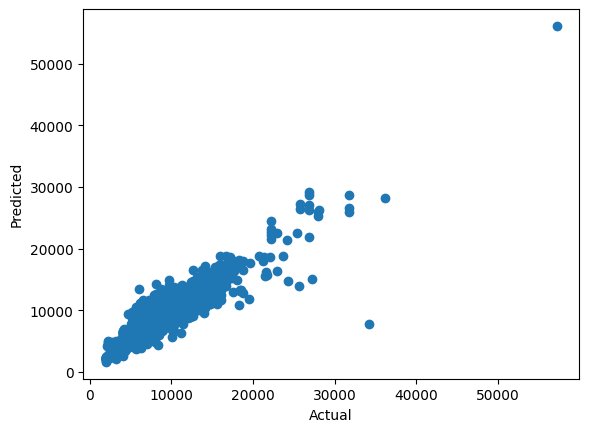

In [57]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

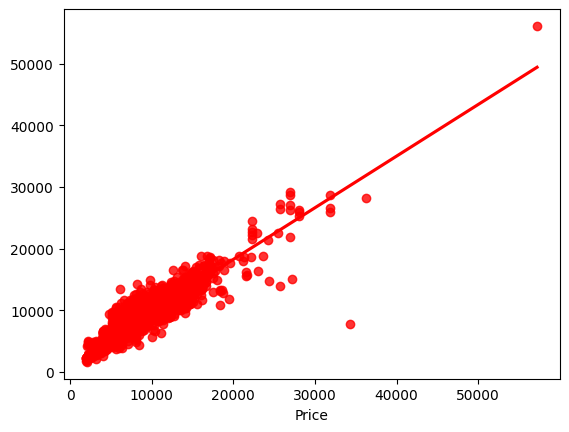

In [58]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [60]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
6076,10844,12359.407017,-1515.407017
3544,4959,6164.642062,-1205.642062
7313,14781,12680.470494,2100.529506
5032,3858,3792.739062,65.260938
2483,12898,13863.619741,-965.619741
...,...,...,...
9797,7408,10785.750016,-3377.750016
9871,4622,5418.546134,-796.546134
10063,7452,6980.589750,471.410250
7623,4823,4713.270764,109.729236
